In [1]:
import evaluation.evaluate
reload(evaluation.evaluate)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
mpl.rcParams['xtick.direction']='out'
mpl.rcParams['ytick.direction']='out'
mpl.rcParams['xtick.major.pad']=2
mpl.rcParams['xtick.minor.pad']=2
mpl.rcParams['ytick.major.pad']=1
mpl.rcParams['ytick.minor.pad']=1
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [14,6]
#mpl.rcParams['figure.figsize'] = [6.8, 9/2.0]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 8
mpl.rcParams['figure.facecolor'] = 'w'
#mpl.rcParams['figure.edgecolor'] = 'w'
mpl.rcParams['legend.labelspacing'] = .3
#mpl.rcParams['legend.borderpad']=0.5
mpl.rcParams['legend.borderaxespad']=0.1
mpl.rcParams['legend.columnspacing']=1.2
mpl.rcParams['figure.subplot.wspace'] = .4
mpl.rcParams['figure.subplot.hspace'] = .2
#mpl.rcParams['figure.autolayout']=False
mpl.rcParams['savefig.bbox']='tight'
mpl.rcParams['figure.subplot.left']=0.0
mpl.rcParams['figure.subplot.right']=1
#mpl.rcParams['legend.isaxes']=False
#matplotlib.ticker.Sc
figfolder = r'C:/Users/rachel/git/2014-prob-emg/paper/figs/'

In [3]:
folderpath = 'C:/Users/rachel/Desktop/emg/results_final/'

In [4]:
e = evaluation.evaluate.Evaluation()

In [5]:
#e.add_folder(folderpath, e.add_hdf5)
#e.results.to_pickle('all_results')

In [6]:
e.results=pd.read_pickle('all_results')

In [7]:
e.make_same('file', ['angle', 'angle_small'])
e.make_same('file', ['stroke$_1$', 'stroke_left', 'stroke_P_4_self_left'])
e.make_same('file', ['stroke$_2$', 'stroke_right', 'stroke_P_4_self_right'])
e.make_same('file', ['pEMG', 'pemg', 'dataset-20140123-0R-a'])
e.make_same('file', ['action','physical'])
e.make_same('file', ['0G$_2$', '0g_tiny', '2011-05-10-vogel'])
e.make_same('file', ['0G$_1$', '0g', 'Hannes1'])
e.make_same('file', ['knee_old', 'bdsemg'])
e.make_same('file', ['knee', 'knee_1'])
e.make_same('file', ['knee$_3$', 'knee_3'])
e.make_same('file', ['knee$_5$', 'knee_5'])
e.make_same('model', ['pPCA', 'ppca'])
e.make_same('model', ['GMM', 'gmm'])
e.make_same('model', ['ICA', 'ica'])
e.make_same('model', ['FA', 'fa'])
e.make_same('model', ['MFA', 'mfa'])
e.make_same('model', ['VAE', 'VA', 'vae'])
e.make_same('model', ['MST', 'mst'])
e.make_same('function', ['lc','logcosh'])
e.make_same('function', ['lo','laplace'])
e.make_same('cov', ['diagonal', 'diag'])
e.make_same('fft', ['', -1, 0])
e.make_same('fft', ['fft', 1])
e.make_same('classification',['',-1,0])
e.make_same('classification',['class',1])

In [8]:
e.rename_attribute('window_size', 'window size')
e.rename_attribute('n_mixcomps', 'mixture components')
e.rename_attribute('n_features', 'features')
e.rename_attribute('n_latents','latents')

In [9]:
#e.convert_flags()
e.convert_flags_abbr()
e.set_order('window size', 'ascend')
e.set_order('mixture components', 'ascend')
e.set_order('latents','ascend')
e.set_order('model', ['pPCA','FA','ICA','VAE','GMM','MST','MFA'])
e.set_order('flags', ['raw', 's', 'w', 'sw', 'r', 'rs', 'rw', 'rsw'])
e.set_order('function', ['lc', 'lo'])
        

In [10]:
e.results.columns.values

array([u'classification', u'cov', u'fft', u'file', u'function',
       u'max_iter', u'model', 'features', 'latents', 'mixture components',
       u'n_splits', u'offset', u'rectified', u'scaled', 'test mean',
       'test std', u'test_fraction', 'train mean', 'train std',
       u'whitened', 'window size', 'flags'], dtype=object)

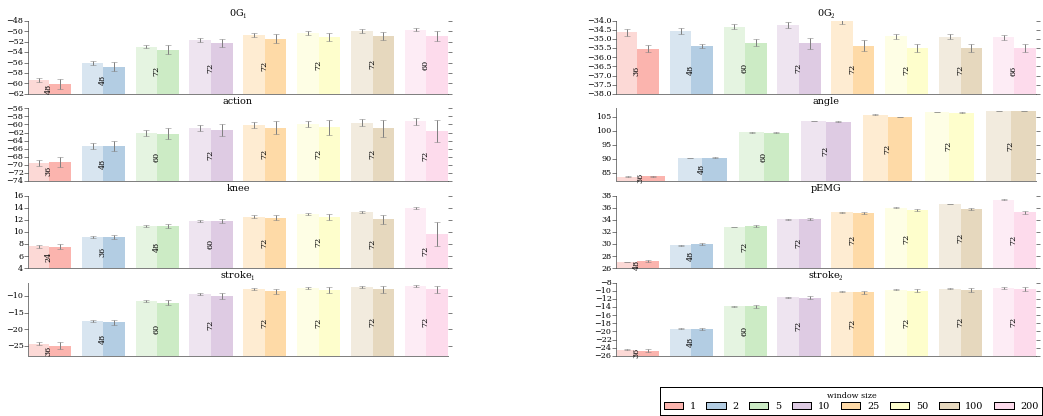

In [11]:
e.unfilter()
e.filter('model', 'pPCA')
e.filter('offset',10)
e.filter('file',['0G$_1$','0G$_2$','action','angle','knee','pEMG','stroke$_1$','stroke$_2$'])
e.filter('latents',[1,2,5,10,25,50])
#e.filter('window size', [1,2, 5, 10, 25, 50,100,200])
e.filter('fft','')
e.filter('classification','')
best = e.best_results_for(['file', 'window size'], fun='max')
counts = e.best_results_for(['file', 'window size'], fun='count')

e.group_subplots(best, counts, error=True, no_rows=4, colormap='Pastel1', base=2, eps=.5)
#plt.savefig(figfolder+r'\main\bestof_file_window_size_pPCA_lat[2,5,10,25,50].eps')

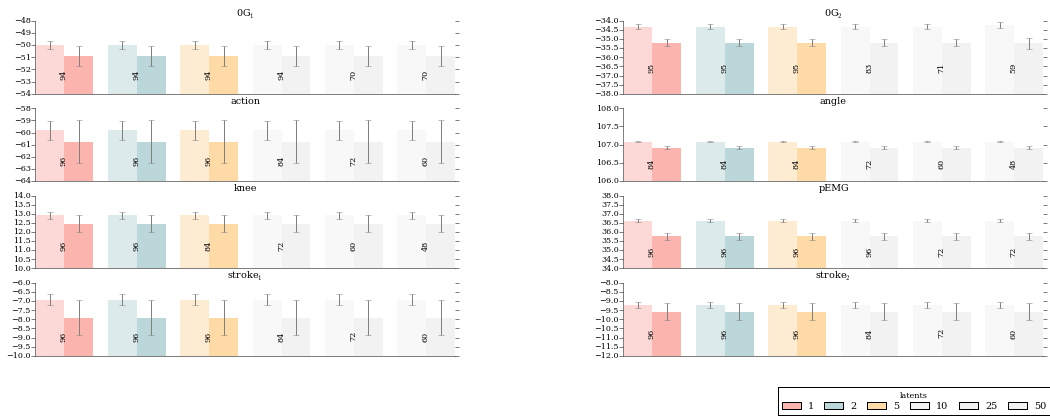

In [12]:
e.unfilter()
e.filter('model', 'pPCA')
e.filter('offset',10)
e.filter('file',['0G$_1$','0G$_2$','action','angle','knee','pEMG','stroke$_1$','stroke$_2$'])
e.filter('latents',[1,2,5,10,25,50])
#e.filter('window size', [1,2, 5, 10, 25, 50,100,200])
e.filter('fft','')
e.filter('classification','')
best = e.best_results_for(['file', 'latents'], fun='max')
counts = e.best_results_for(['file', 'latents'], fun='count')

e.group_subplots(best, counts, error=True, no_rows=4, colormap='Pastel1', base=2, eps=.5)


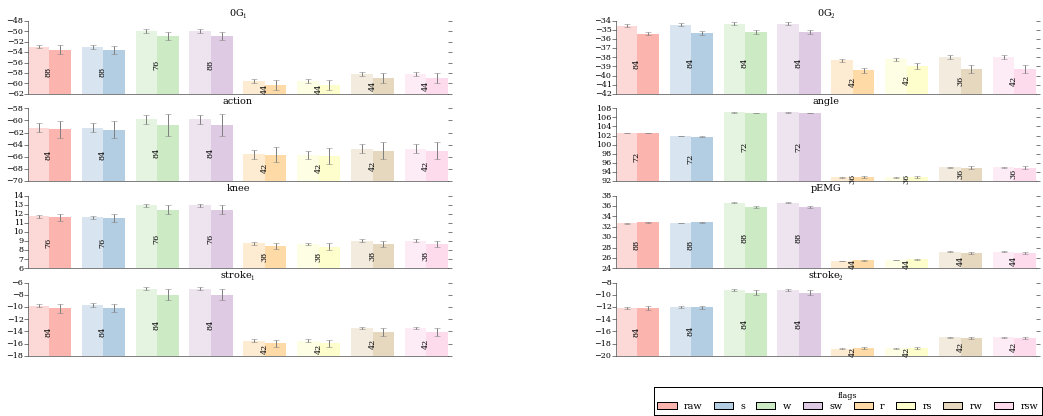

In [13]:
e.unfilter()
e.filter('model', 'pPCA')
e.filter('offset',10)
e.filter('file',['0G$_1$','0G$_2$','action','angle','knee','pEMG','stroke$_1$','stroke$_2$'])
e.filter('latents',[1,2,5,10,25,50])
#e.filter('window size', [1,2, 5, 10, 25, 50,100,200])
e.filter('fft','')
e.filter('classification','')
best = e.best_results_for(['file', 'flags'], fun='max')
counts = e.best_results_for(['file', 'flags'], fun='count')
#print counts
e.group_subplots(best, counts, error=True, no_rows=4, colormap='Pastel1', base=2, eps=.5)

In [ ]:
best.shape


In [ ]:
best